In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter

sns.set()
sns.set_style("whitegrid")

out_file_path = "../../img/"

In [2]:
cu_data = pd.read_csv("../data/spmv-cusparse-5-4090.csv",
                      header=None,
                      names=[
                          "cu_pro", "mat", "x", "y", "compute", "m", "n", "nnz",
                          "cu_time", "cu_gflops"
                      ])
cu_data=cu_data.loc[:,["cu_pro", "mat","nnz", "cu_time", "cu_gflops"]]
# print(cu_data)
cu_info = cu_data["cu_pro"].unique()
for diff_pro in cu_info:
    temp_data = cu_data[cu_data["cu_pro"].isin([diff_pro])]
    exec("%s=temp_data.copy()" % diff_pro)
print(cu_info)

['spmv_csr_16BF_32_32' 'spmv_csr_32F' 'spmv_csr_64F' 'spmv_csr_8_32_32']


In [3]:
csr5_data = pd.read_csv("../data/spmv-csr5-4090.csv",
                      header=None,
                      names=[
                          "csr5_pro", "mat", "x", "y", "compute", "m", "n", "nnz",
                          "csr5_time", "csr5_gflops"
                      ])
csr5_data=csr5_data.loc[:,["csr5_pro", "mat","nnz","csr5_time", "csr5_gflops"]]
# print(csr5_data)
csr5_info = csr5_data["csr5_pro"].unique()
for diff_pro in csr5_info:
    temp_data = csr5_data[csr5_data["csr5_pro"].isin([diff_pro])]
    exec("%s=temp_data.copy()" % diff_pro)
print(csr5_info)

['spmv_csr5_64' 'spmv_csr5_32' 'spmv_csr5_16']


In [4]:
tile_data = pd.read_csv("../data/spmv-tile-4090.csv",
                      header=None,
                      names=[
                          "tile_pro", "mat", "x", "y", "compute", "m", "n", "nnz",
                          "tile_time", "tile_gflops"
                      ])
tile_data=tile_data.loc[:,["tile_pro", "mat","nnz","tile_time", "tile_gflops"]]
# print(tile_data)
tile_info = tile_data["tile_pro"].unique()
for diff_pro in tile_info:
    temp_data = tile_data[tile_data["tile_pro"].isin([diff_pro])]
    exec("%s=temp_data.copy()" % diff_pro)
print(tile_info)

['exe_spmv_tile_32' 'exe_spmv_tile_64' 'exe_spmv_tile_16']


In [5]:
cu_data_64 = spmv_csr_64F[["mat", "cu_gflops", "nnz"]]
cu_data_32 = spmv_csr_32F[["mat", "cu_gflops"]]
cu_data_16 = spmv_csr_16BF_32_32[["mat", "cu_gflops"]]
cu_data_8  = spmv_csr_8_32_32[["mat", "cu_gflops"]]

cu_data_comp = pd.merge(cu_data_64, cu_data_32, how='inner', on='mat', suffixes=("_64",""))
cu_data_comp = pd.merge(cu_data_comp, cu_data_16, how='inner', on='mat', suffixes=("_32",""))
cu_data_comp = pd.merge(cu_data_comp, cu_data_8, how='inner', on='mat', suffixes=("_16","_8"))

cu_data_comp["speedup_32"] = cu_data_comp["cu_gflops_32"] / cu_data_comp["cu_gflops_64"]
cu_data_comp["speedup_16"] = cu_data_comp["cu_gflops_16"] / cu_data_comp["cu_gflops_64"]
cu_data_comp["speedup_8"] = cu_data_comp["cu_gflops_8"] / cu_data_comp["cu_gflops_64"]

# print(cu_data_comp)
cu_max_32 = cu_data_comp.loc[cu_data_comp["speedup_32"].idxmax()]
cu_max_16 = cu_data_comp.loc[cu_data_comp["speedup_16"].idxmax()]
cu_max_8 = cu_data_comp.loc[cu_data_comp["speedup_8"].idxmax()]
print("max 32 data:")
print(cu_max_32)
print("\nmax 16 data:")
print(cu_max_16)
print("\nmax 8 data:")
print(cu_max_8)


max 32 data:
mat             /ssget/MM/ND/nd6k/nd6k.cbd
cu_gflops_64                       139.896
nnz                                6897316
cu_gflops_32                       618.178
cu_gflops_16                       678.937
cu_gflops_8                        620.737
speedup_32                         4.41884
speedup_16                        4.853155
speedup_8                         4.437132
Name: 1984, dtype: object

max 16 data:
mat             /ssget/MM/Gupta/gupta3/gupta3.cbd
cu_gflops_64                              144.033
nnz                                       9323427
cu_gflops_32                              357.062
cu_gflops_16                              759.979
cu_gflops_8                                734.88
speedup_32                               2.479029
speedup_16                               5.276423
speedup_8                                5.102164
Name: 160, dtype: object

max 8 data:
mat             /ssget/MM/Gupta/gupta3/gupta3.cbd
cu_gflops_64          

In [6]:
csr5_data_64 = spmv_csr5_64[["mat", "csr5_gflops", "nnz"]]
csr5_data_32 = spmv_csr5_32[["mat", "csr5_gflops"]]
csr5_data_16 = spmv_csr5_16[["mat", "csr5_gflops"]]

csr5_data_comp = pd.merge(csr5_data_64, csr5_data_32, how='inner', on='mat', suffixes=("_64",""))
csr5_data_comp = pd.merge(csr5_data_comp, csr5_data_16, how='inner', on='mat', suffixes=("_32","_16"))

csr5_data_comp["speedup_32"] = csr5_data_comp["csr5_gflops_32"] / csr5_data_comp["csr5_gflops_64"]
csr5_data_comp["speedup_16"] = csr5_data_comp["csr5_gflops_16"] / csr5_data_comp["csr5_gflops_64"]

# print(csr5_data_comp)
csr5_max_32 = csr5_data_comp.loc[csr5_data_comp["speedup_32"].idxmax()]
csr5_max_16 = csr5_data_comp.loc[csr5_data_comp["speedup_16"].idxmax()]
print("max 32 data:")
print(csr5_max_32)
print("\nmax 16 data:")
print(csr5_max_16)

max 32 data:
mat               /ssget/MM/Brogan/specular/specular.cbd
csr5_gflops_64                                   137.245
nnz                                              7647616
csr5_gflops_32                                   716.735
csr5_gflops_16                                    800.04
speedup_32                                      5.222303
speedup_16                                      5.829283
Name: 2573, dtype: object

max 16 data:
mat               /ssget/MM/Kim/kim2/kim2.cbd
csr5_gflops_64                        136.539
nnz                                  11330020
csr5_gflops_32                          206.6
csr5_gflops_16                        846.019
speedup_32                           1.513121
speedup_16                           6.196171
Name: 2098, dtype: object


In [7]:
tile_data_64 = exe_spmv_tile_64[["mat", "tile_gflops", "nnz"]]
tile_data_32 = exe_spmv_tile_32[["mat", "tile_gflops"]]
tile_data_16 = exe_spmv_tile_16[["mat", "tile_gflops"]]

tile_data_comp = pd.merge(tile_data_64, tile_data_32, how='inner', on='mat', suffixes=("_64",""))
tile_data_comp = pd.merge(tile_data_comp, tile_data_16, how='inner', on='mat', suffixes=("_32","_16"))
# print(tile_data_comp)
tile_data_comp["speedup_32"] = tile_data_comp["tile_gflops_32"] / tile_data_comp["tile_gflops_64"]
tile_data_comp["speedup_16"] = tile_data_comp["tile_gflops_16"] / tile_data_comp["tile_gflops_64"]

# print(tile_data_comp)
tile_max_32 = tile_data_comp.loc[tile_data_comp["speedup_32"].idxmax()]
tile_max_16 = tile_data_comp.loc[tile_data_comp["speedup_16"].idxmax()]
print("max 32 data:")
print(tile_max_32)
print("\nmax 16 data:")
print(tile_max_16)

max 32 data:
mat               /ssget/MM/TSOPF/TSOPF_RS_b2383_c1/TSOPF_RS_b23...
tile_gflops_64                                               210.75
nnz                                                        16171169
tile_gflops_32                                              1236.33
tile_gflops_16                                               743.64
speedup_32                                                 5.866335
speedup_16                                                 3.528541
Name: 2121, dtype: object

max 16 data:
mat               /ssget/MM/BenElechi/BenElechi1/BenElechi1.cbd
tile_gflops_64                                           178.74
nnz                                                    13150496
tile_gflops_32                                           753.67
tile_gflops_16                                           711.13
speedup_32                                             4.216572
speedup_16                                             3.978572
Name: 26, dtype: object

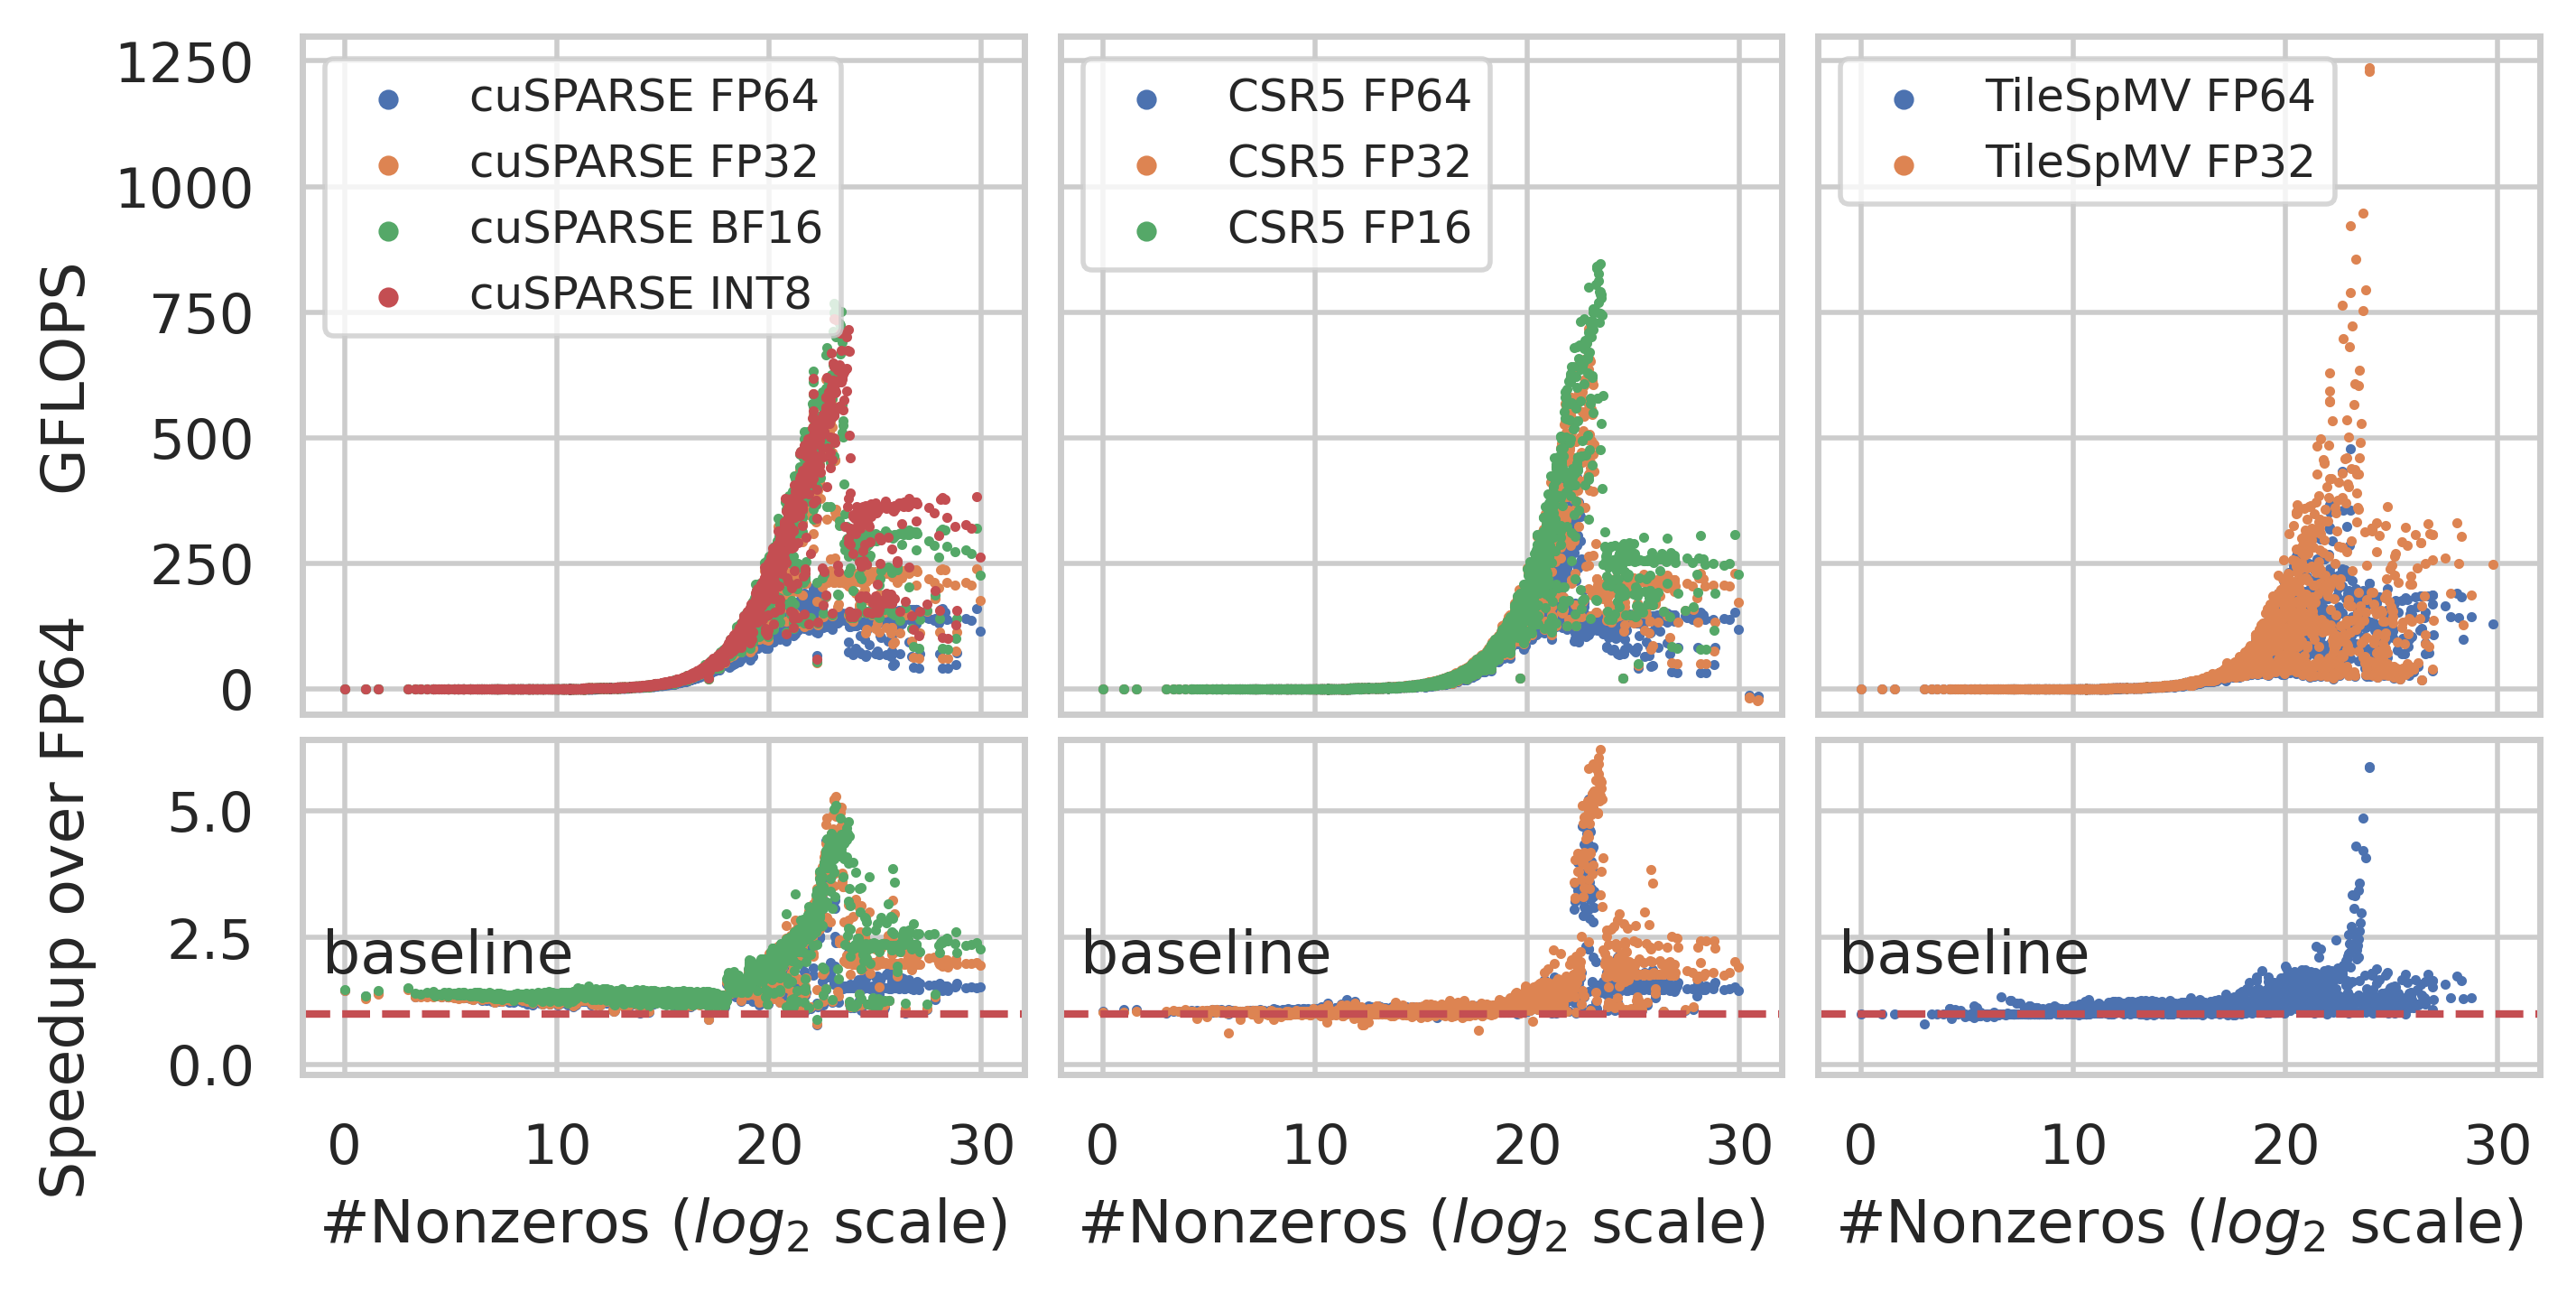

In [8]:
# plt.figure(figsize=(15, 10), dpi=400)
plt.figure(figsize=(8, 5), dpi=400)
plt.subplots_adjust(wspace=0.05, hspace=0.05)

dot_size = 1
legend_font_size = 9

plt.subplot(231)

plt.scatter(np.log2(spmv_csr_64F["nnz"]),
            (spmv_csr_64F["cu_gflops"]),
            label="cuSPARSE FP64",
            s=dot_size)
plt.scatter(np.log2(spmv_csr_32F["nnz"]),
            (spmv_csr_32F["cu_gflops"]),
            label="cuSPARSE FP32",
            s=dot_size)
plt.scatter(np.log2(spmv_csr_16BF_32_32["nnz"]),
            (spmv_csr_16BF_32_32["cu_gflops"]),
            label="cuSPARSE BF16",
            s=dot_size)
plt.scatter(np.log2(spmv_csr_8_32_32["nnz"]),
            (spmv_csr_8_32_32["cu_gflops"]),
            label="cuSPARSE INT8",
            s=dot_size)

plt.legend(loc=2, fontsize=legend_font_size, markerscale=3)
plt.xlim(-2, 32)
plt.ylim(-50, 1300)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
# plt.xlabel("#Nonzeros (log scale)")
plt.ylabel("GFLOPS")

# --------------------------------------------------------------------------------------------

plt.subplot(232)

plt.scatter(np.log2(spmv_csr5_64["nnz"]),
            (spmv_csr5_64["csr5_gflops"]),
            label="CSR5 FP64",
            s=dot_size)
plt.scatter(np.log2(spmv_csr5_32["nnz"]),
            (spmv_csr5_32["csr5_gflops"]),
            label="CSR5 FP32",
            s=dot_size)
plt.scatter(np.log2(spmv_csr5_16["nnz"]),
            (spmv_csr5_16["csr5_gflops"]),
            label="CSR5 FP16",
            s=dot_size)

plt.legend(loc=2, fontsize=legend_font_size, markerscale=3)
plt.xlim(-2, 32)
plt.ylim(-50, 1300)

# plt.xlabel("#Nonzeros (log scale)")
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
# plt.ylabel("Gflops on RTX 4090")

# --------------------------------------------------------------------------------------------

plt.subplot(233)

plt.scatter(np.log2(exe_spmv_tile_64["nnz"]),
            (exe_spmv_tile_64["tile_gflops"]),
            label="TileSpMV FP64",
            s=dot_size)

plt.scatter(np.log2(exe_spmv_tile_32["nnz"]),
            (exe_spmv_tile_32["tile_gflops"]),
            label="TileSpMV FP32",
            s=dot_size)
# plt.scatter(np.log2(exe_spmv_tile_16["nnz"]),
#             (exe_spmv_tile_16["tile_gflops"]),
#             label="TileSpMV FP16",
#             s=dot_size)

plt.legend(loc=2, fontsize=legend_font_size, markerscale=3)
plt.xlim(-2, 32)
plt.ylim(-50, 1300)

# plt.xlabel("#Nonzeros (log scale)")
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
# plt.ylabel("Gflops on RTX 4090")

# --------------------------------------------------------------------------------------------

plt.subplot(437)

plt.scatter(np.log2(cu_data_comp["nnz"]),
            (cu_data_comp["speedup_32"]),
            label="cuSPARSE\nFP32 speedup over FP64",
            s=dot_size)
plt.scatter(np.log2(cu_data_comp["nnz"]),
            (cu_data_comp["speedup_16"]),
            label="BF16 speedup over FP64",
            s=dot_size)
plt.scatter(np.log2(cu_data_comp["nnz"]),
            (cu_data_comp["speedup_8"]),
            label="INT8 speedup over FP64",
            s=dot_size)

text_her_loc = 10.8
text_ver_loc = 0.8
plt.axhline(1, color="r", linestyle="--")
plt.text(text_her_loc, 1 + text_ver_loc, 'baseline', horizontalalignment="right")

plt.xlim(-2, 32)
plt.ylim(-0.2, 6.4)

# plt.legend(loc=2, fontsize=legend_font_size)

plt.xlabel("#Nonzeros ($log_2$ scale)")
plt.ylabel("Speedup over FP64",labelpad=14)

# --------------------------------------------------------------------------------------------

plt.subplot(438)

plt.scatter(np.log2(csr5_data_comp["nnz"]),
            (csr5_data_comp["speedup_32"]),
            label="CSR5\nFP32 speedup over FP64",
            s=dot_size)
plt.scatter(np.log2(csr5_data_comp["nnz"]),
            (csr5_data_comp["speedup_16"]),
            label="FP16 speedup over FP64",
            s=dot_size)

plt.axhline(1, color="r", linestyle="--")
plt.text(text_her_loc, 1 + text_ver_loc, 'baseline', horizontalalignment="right")

plt.xlim(-2, 32)
plt.ylim(-0.2, 6.4)

# plt.legend(loc=2, fontsize=legend_font_size)

plt.xlabel("#Nonzeros ($log_2$ scale)")
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])
# plt.ylabel("Speedup over FP64",labelpad=14)

# --------------------------------------------------------------------------------------------

plt.subplot(439)

plt.scatter(np.log2(tile_data_comp["nnz"]),
            (tile_data_comp["speedup_32"]),
            label="TileSpMV\nFP32 speedup over FP64",
            s=dot_size)
# plt.scatter(np.log2(tile_data_comp["nnz"]),
#             (tile_data_comp["speedup_16"]),
#             label="FP16 speedup over FP64",
#             s=dot_size)

plt.axhline(1, color="r", linestyle="--")
plt.text(text_her_loc, 1 + text_ver_loc, 'baseline', horizontalalignment="right")

plt.xlim(-2, 32)
plt.ylim(-0.2, 6.4)

# plt.legend(loc=2, fontsize=legend_font_size)

plt.xlabel("#Nonzeros ($log_2$ scale)")
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])
# plt.ylabel("Speedup over FP64",labelpad=14)

# --------------------------------------------------------------------------------------------

# plt.show()
plt.savefig ("spmv_4090.pdf", dpi= 400, format = "pdf", bbox_inches='tight', pad_inches=0.0) 


In [9]:
cu_data_comp_big=cu_data_comp.loc[(cu_data_comp["nnz"] > 2**25)].copy()
csr5_data_comp_big=csr5_data_comp.loc[(csr5_data_comp["nnz"] > 2**25)].copy()
tile_data_comp_big=tile_data_comp.loc[(tile_data_comp["nnz"] > 2**25)].copy()

print(cu_data_comp_big["speedup_32"].mean())
print(cu_data_comp_big.loc[cu_data_comp_big["speedup_32"].idxmax()]["speedup_32"])
print(cu_data_comp_big.loc[cu_data_comp_big["speedup_32"].idxmax()]["mat"])

print(cu_data_comp_big["speedup_16"].mean())
print(cu_data_comp_big.loc[cu_data_comp_big["speedup_16"].idxmax()]["speedup_16"])

print(cu_data_comp_big["speedup_8"].mean())
print(cu_data_comp_big.loc[cu_data_comp_big["speedup_8"].idxmax()]["speedup_8"])

print("csr5:")
print(csr5_data_comp_big["speedup_32"].mean())
print(csr5_data_comp_big.loc[csr5_data_comp_big["speedup_32"].idxmax()]["speedup_32"])

print(csr5_data_comp_big["speedup_16"].mean())
print(csr5_data_comp_big.loc[csr5_data_comp_big["speedup_16"].idxmax()]["speedup_16"])

# cu_data_comp_big.to_csv("cu_data_comp_big.csv",sep=",")

print("=========================================")
print("cu spmv 8  speedup max:",cu_data_comp["speedup_8"].max())
print("cu spmv 16 speedup max:",cu_data_comp["speedup_16"].max())
print("cu spmv 32 speedup max:",cu_data_comp["speedup_32"].max())

print("csr5 spmv 16 speedup max:",csr5_data_comp["speedup_16"].max())
print("csr5 spmv 32 speedup max:",csr5_data_comp["speedup_32"].max())

print("tile spmv 32 speedup max:",tile_data_comp["speedup_32"].max())

print("cu spmv 64 max", spmv_csr_64F["cu_gflops"].max())
print("cu spmv 32 max", spmv_csr_32F["cu_gflops"].max())
print("cu spmv 16 max", spmv_csr_16BF_32_32["cu_gflops"].max())
print("cu spmv 8 max", spmv_csr_8_32_32["cu_gflops"].max())

print("csr5 spmv 64 max", spmv_csr5_64["csr5_gflops"].max())
print("csr5 spmv 32 max", spmv_csr5_32["csr5_gflops"].max())
print("csr5 spmv 16 max", spmv_csr5_16["csr5_gflops"].max())

print("tile spmv 64 max", exe_spmv_tile_64["tile_gflops"].max())
print("tile spmv 32 max", exe_spmv_tile_32["tile_gflops"].max())



1.5127912656437967
1.9274137689257929
/ssget/MM/DIMACS10/hugebubbles-00010/hugebubbles-00010.cbd
1.9554481295926989
3.241404513719208
2.3055016483357837
3.8505568846753673
csr5:
1.464204563532842
1.8609029463034485
1.9069960045710275
3.8414156821872223
cu spmv 8  speedup max: 5.1021640873966385
cu spmv 16 speedup max: 5.276422764227643
cu spmv 32 speedup max: 4.418839709498485
csr5 spmv 16 speedup max: 6.1961710573535775
csr5 spmv 32 speedup max: 5.222303180443732
tile spmv 32 speedup max: 5.866334519572954
cu spmv 64 max 212.941
cu spmv 32 max 618.178
cu spmv 16 max 767.595
cu spmv 8 max 736.576
csr5 spmv 64 max 439.766
csr5 spmv 32 max 716.735
csr5 spmv 16 max 846.019
tile spmv 64 max 478.93
tile spmv 32 max 1236.33
